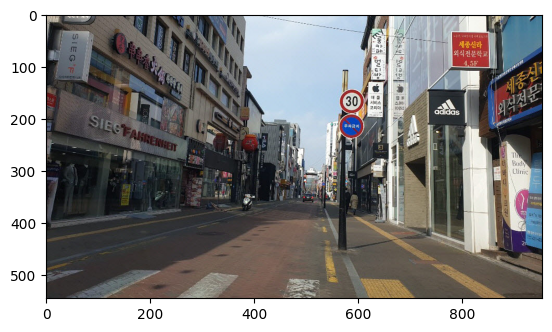

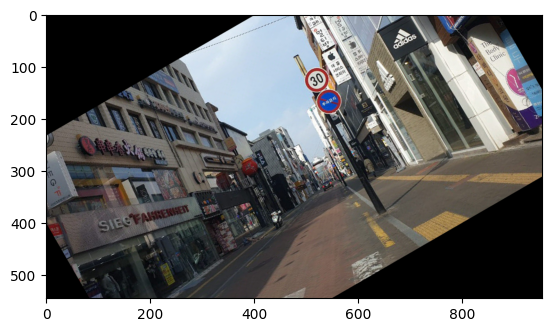

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('image02.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

angle = 30

h, w = image.shape[:2]
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
    #getrotation matrix2D(중심 좌표, 회전 각도, 크기변환 비율)


rotated_img = cv2.warpAffine(image, M, (w, h))
                #warpAffine(원본 이미지, 회전 행렬, 이미지 크기)


plt.imshow(image)
plt.show()

plt.imshow(rotated_img)
plt.show()


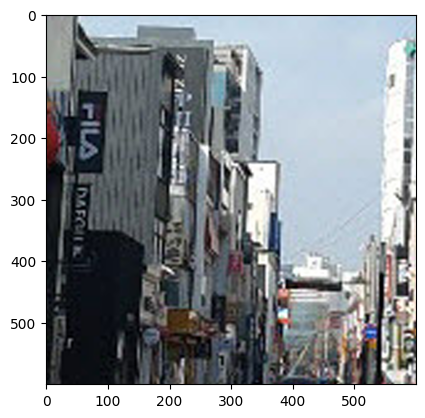

In [3]:
h, w = image.shape[:2]

zoom_scale = 4 #이미지 확대 / 축소

enlarged_img = cv2.resize(image, (w*zoom_scale, h*zoom_scale), interpolation=cv2.INTER_CUBIC)
            #resize(원본 이미지,(최종 너비, 최종 높이), 이미지 보간 방법 (ex: cv2.INTER_CUBIC))
center = [enlarged_img.shape[0]//2, enlarged_img.shape[1]//2]
cut_half = 300
zoomed_img = enlarged_img[center[0]-cut_half:center[0]+cut_half, center[1]-cut_half:center[1]+cut_half]

plt.imshow(zoomed_img)
plt.show()

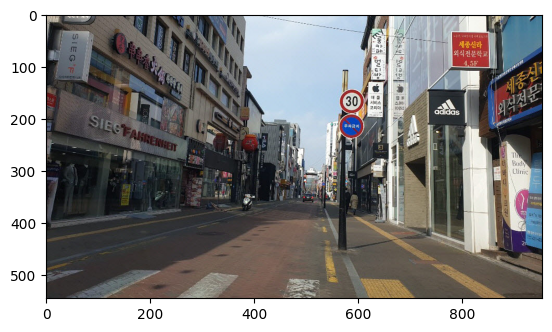

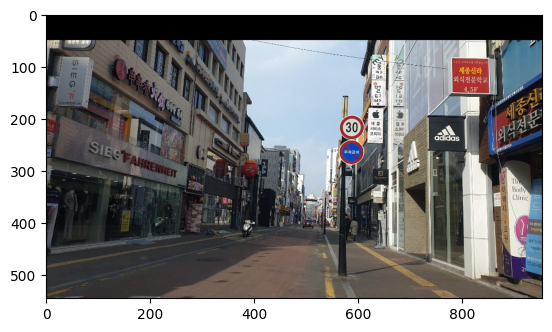

In [4]:

#이미지 파일 불러오기
image = cv2.imread('image02.jpeg')
#image bgr -> rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#이미지 이동할 거리 설정
shift = (0, 50)

#변환 행렬 생성
M = np.float32([
    [1, 0, shift[0]],
    [0, 1, shift[1]]
])

#이동 변환 적용

shifted_img = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

#원본 이미지 보기 
plt.imshow(image)
plt.show()

#이동변환 적용한 이미지
plt.imshow(shifted_img)
plt.show()

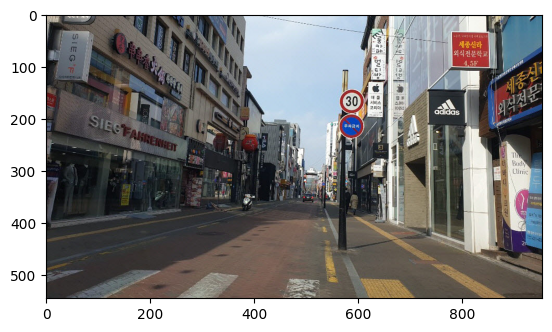

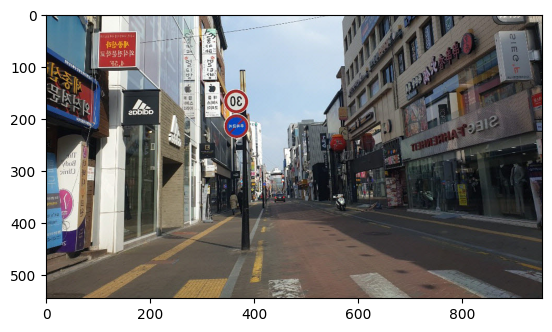

In [5]:
#이미지 파일 불러오기
image = cv2.imread('image02.jpeg')
#image bgr -> rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#이미지 좌우 반전
#1 좌우
#0 상하
flipped = cv2.flip(image, 1)

#원본 이미지 보기
plt.imshow(image)
plt.show()

#이미지 반전
plt.imshow(flipped)
plt.show()

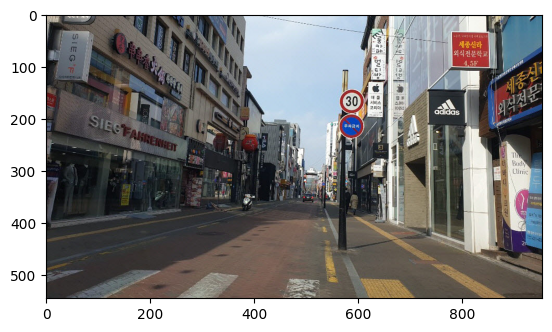

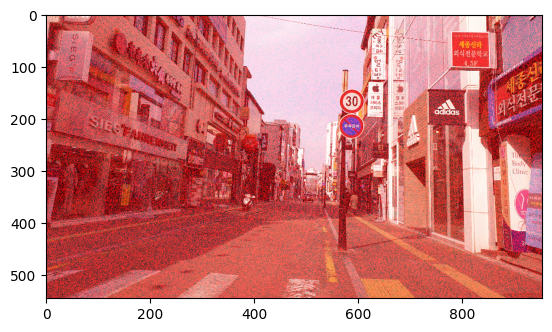

In [6]:
#이미지 파일 불러오기
image = cv2.imread('image02.jpeg')
#image bgr -> rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#salt-and-pepper noise 추가
noise = np.zeros(image.shape, dtype=np.uint8)
cv2.randu(noise, 0, 255)
black = noise < 30
white = noise > 230
noise[black] = 0
noise[white] = 255

#각 채널별 노이즈 추가 
noise_b = noise[:, :, 0]
noise_g = noise[:, :, 1]
noise_r = noise[:, :, 2]
noisy_img = cv2.merge([cv2.add(image[:, :, 0], noise_b), 
                       cv2.add(image[:, :, 1], noise_g), 
                       cv2.add(image[:, :, 2], noise_r)])

#원본 이미지 보기
plt.imshow(image)
plt.show()

#noise added image
plt.imshow(noisy_img)
plt.show()

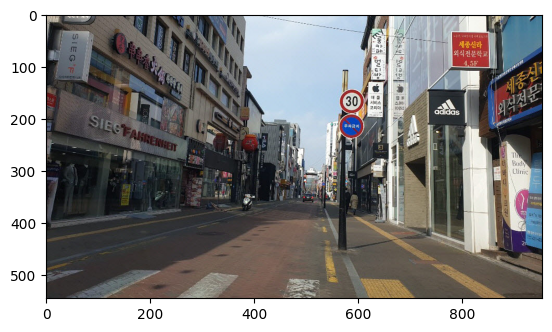

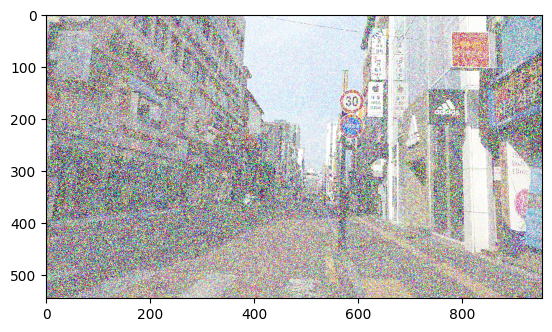

In [7]:
#이미지 파일 불러오기
image = cv2.imread('image02.jpeg')
#image bgr -> rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#gaussian noise 추가
mean = 0
var = 100
sigma = var**0.5
gauss = np.random.normal(mean, sigma, image.shape)
gauss = gauss.reshape(image.shape).astype(dtype=np.uint8)
noisy_img = cv2.add(image, gauss)

#원본 이미지
plt.imshow(image)
plt.show()

#noisy 이미지
plt.imshow(noisy_img)
plt.show()

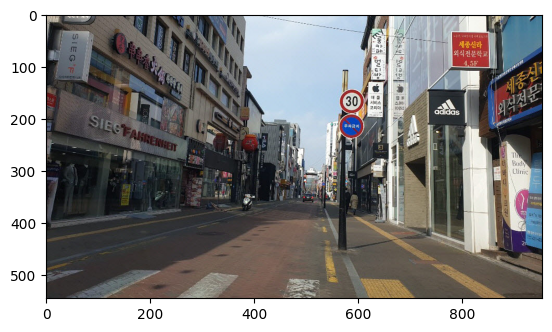

<function matplotlib.pyplot.show(close=None, block=None)>

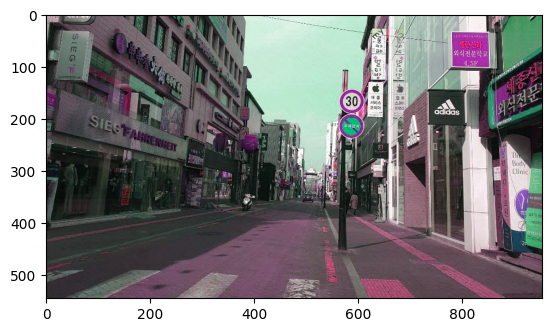

In [8]:
#이미지 파일 불러오기
image = cv2.imread('image02.jpeg')
#image bgr -> rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#bgr 색공간에서 hsv 색공간으로 변환
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue_shift = 30
hsv_img[:, :, 0] = hsv_img[:, :, 0] + hue_shift % 180
rgb_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

plt.imshow(image)
plt.show()

plt.imshow(rgb_img)
plt.show

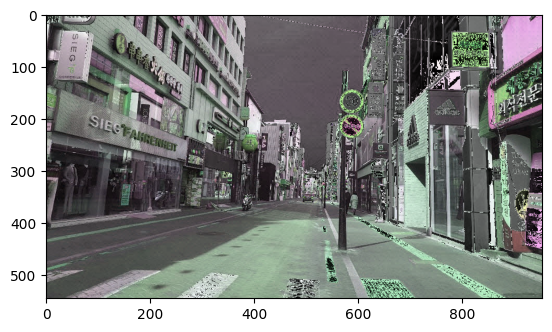

In [9]:
#이미지 파일 불러오기
image = cv2.imread('image02.jpeg')
#image bgr -> rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

#hsv[h, w, c]
hsv_img[:,:, 0] += 50 #hue 증가
hsv_img[:,:, 1] = np.uint8((hsv_img[:,:, 1]) * 0.5)
hsv_img[:,:, 2] = np.uint8((hsv_img[:,:, 2]) * 1.5)

#imshow <- bgr / rgb로 강제 인코딩

rgb_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_img)
plt.show()

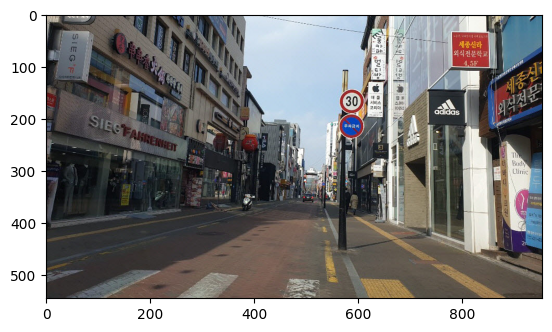

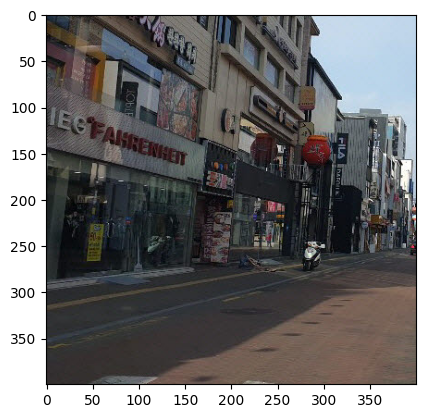

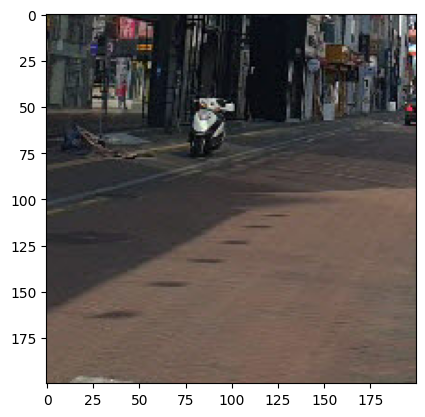

In [10]:
x, y, w, h = 300, 300, 200, 200 # (100, 100) 좌펴에서 (200 x 200) 크기로 자름
crop_img_wide= image[y-h:y+h, x-w:x+w] # (x, y) 를 중심으로 2w, 2h 크기로 자름
crop_img_lt = image[y:y+h, x:x+w] # (x, y) 를 기점으로 (w, h) 만큼 아래로 간 크기로 자름

plt.imshow(image)
plt.show()
plt.imshow(crop_img_wide)
plt.show()
plt.imshow(crop_img_lt)
plt.show()

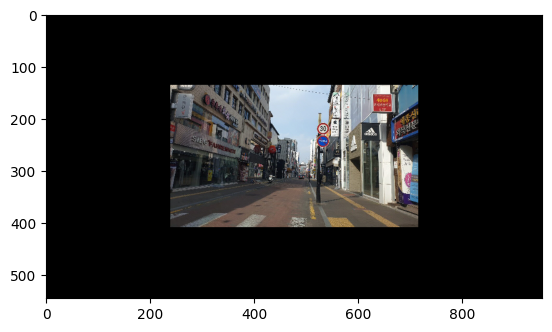

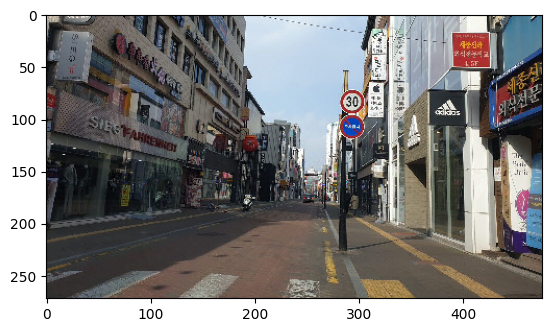

In [11]:
x_diff = 50
y_diff = 100
h,w,c = image.shape

M = np.float32([
    [1, 0, x_diff],
    [0, 1, y_diff]
])
'''
    #x 축으로 50, y축으로 100 이동하는 병진이동행렬
shifted_img = cv2.warpAffine(image, M, image.shape[:2])

M = cv2.getRotationMatrix2D((w // 2, h // 2), 45, 1.0)
rotated_img = cv2.warpAffine(image, M, (w, h))
'''
M = cv2.getRotationMatrix2D((w // 2, h // 2), 0, 0.5) #가장자리를 검은색으로 칠함
halfed_img = cv2.warpAffine(image, M, (w, h))
croped_img = halfed_img[h//2 - h//4:h//2 + h//4, 
                        w//2 - w//4:w//2 + w//4] #가장자리를 잘라낸 이미지

#plt.imshow(image)
#plt.show()
#plt.imshow(shifted_img)
#plt.show()
#plt.imshow(rotated_img)
#plt.show()
plt.imshow(halfed_img)
plt.show()
plt.imshow(croped_img)
plt.show()

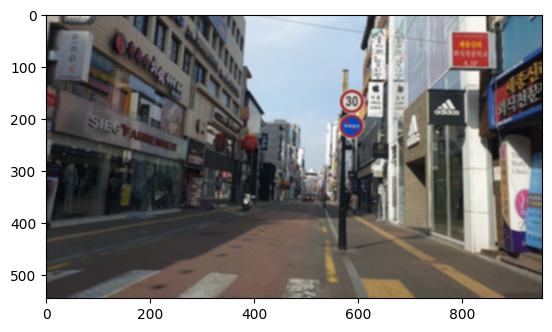

In [12]:
#이미지 파일 불러오기
image = cv2.imread('image02.jpeg')
#image bgr -> rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

blur_img = cv2.GaussianBlur(image, (5, 5), 5)

plt.imshow(blur_img)
plt.show()

In [13]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

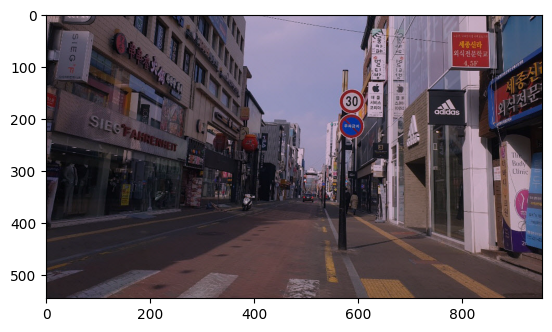

In [14]:
org_img = image.copy()
balance = [0.8, 0.7, 0.8]

for i, value in enumerate(balance):
    if value != 1.0:
        org_img[:,:,i] = cv2.addWeighted(org_img[:,:,i], value, 0,0,0)
        #addweighted : src에 대해 value 만큼의 가중치로 색온도 조절
        
plt.imshow(org_img)
plt.show()

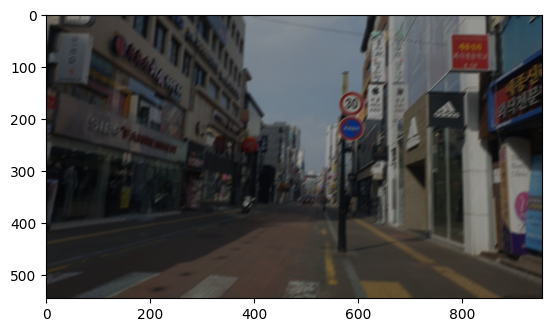

In [15]:
kernal_size = 15
kernal_direction=np.zeros((kernal_size,kernal_size))
kernal_direction[int((kernal_size)//2), :] = np.ones(kernal_size)
kernal_direction /= kernal_size # 커널의 합이 1이 되도록 계산
kernal_matrix = cv2.getRotationMatrix2D((kernal_size/2, kernal_size/2), 45, 1)
kernal = np.hstack((kernal_matrix[:, :2], [[0], [0]]))
        #kernal_matrix[:,:2] <- 회전 행렬에서 병진이동 벡터를 제외하고 회전 행렬 값만 가져옴
        # [[0], [0]] <- 병진이동 벡터 (이동x)
kernal = cv2.warpAffine(kernal_direction, kernal, (kernal_size, kernal_size))

motion_blur_image = cv2.filter2D(image, -1, kernal)
plt.imshow(motion_blur_image)
plt.show()

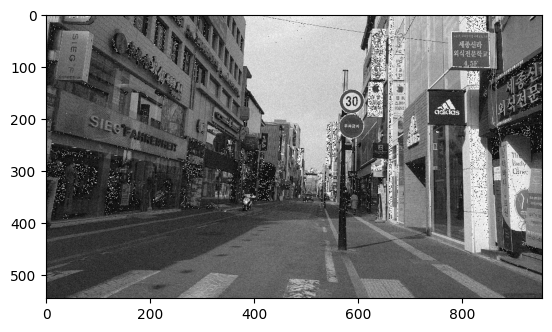

In [16]:
gray_img = cv2.imread('image02.jpeg',cv2.IMREAD_GRAYSCALE)
h, w = image.shape[:2]

mean = 0
var = 100
sigma = var ** 0.5

gaussian = np.random.normal(mean, sigma, (h, w))
noisy_img = gray_img + gaussian.astype(np.uint8)
# uint8 -> 0~255
#cv2.imshow('',noisy_img)
#cv2.waitKey(0)

plt.imshow(noisy_img, cmap='gray')
plt.show()

In [17]:
img = cv2.imread('image02.jpeg')
org_img = img.copy()

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
saturation_factor = 1.5
img_hsv[:, :, 1] = img_hsv[:, :, 1] * saturation_factor

saturated_img = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

cv2.imshow('', org_img)
cv2.waitKey(0)
cv2.imshow('', saturated_img)
cv2.waitKey(0)

-1

In [18]:
img = cv2.imread('image02.jpeg')
org_img = img.copy()

bright_diff = 50
img_brighten = cv2.convertScaleAbs(img, alpha=1, beta=bright_diff)

cv2.imshow('org', org_img)
cv2.imshow('brighten', img_brighten)
cv2.waitKey(0)

-1

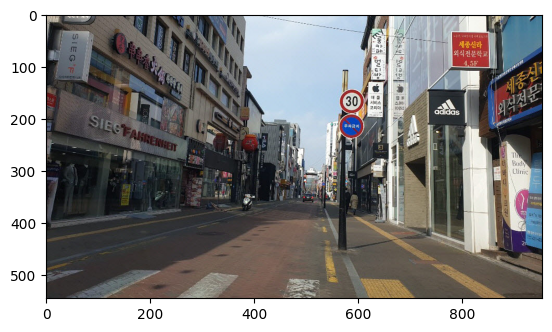

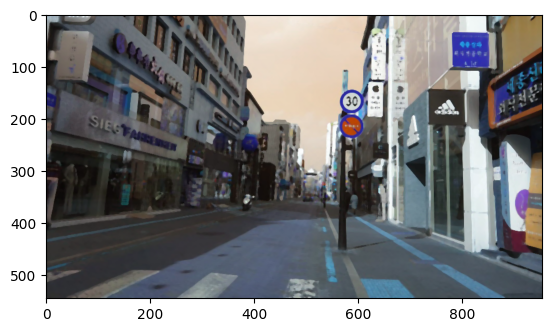

In [19]:
img_filtered = cv2.medianBlur(img, 5)
plt.imshow(image)
plt.show()
plt.imshow(img_filtered)
plt.show()

In [20]:
img_gray = cv2.imread("image02.jpeg", cv2.IMREAD_GRAYSCALE)
img_equalized = cv2.equalizeHist(img_gray)

cv2.imshow("org", img_gray)
cv2.imshow("hist_equal", img_equalized)
cv2.waitKey()

-1